In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import Sequential
model = Sequential()

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
class_names=['airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

In [ ]:
from keras.utils import to_categorical
num_classes=len(class_names)
y_train=to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)
print(y_train.shape)

(50000, 10)


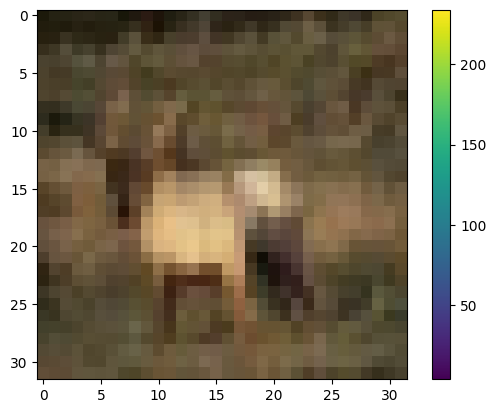

In [ ]:
plt.imshow(x_train[3])
plt.colorbar()
plt.show()

In [ ]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam

In [ ]:
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Flatten

# Assuming model_ff is already defined as a Sequential model
model = Sequential()

# Add layers to the model
model.add(InputLayer(input_shape=(32, 32, 3)))  # Add the correct input shape
model.add(Flatten())
model.add(Dense(128, activation='relu', name='First_hidden_layer'))
model.add(Dense(64, activation='relu', name='Second_hidden_layer'))  # Add the second hidden layer
model.add(Dense(10, activation='softmax', name='Output_layer'))

# Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 3072)              0         
                                                                 
 First_hidden_layer (Dense)  (None, 128)               393344    
                                                                 
 Second_hidden_layer (Dense  (None, 64)                8256      
 )                                                               
                                                                 
 Output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 402250 (1.53 MB)
Trainable params: 402250 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, shuffle=False)

Epoch 1/10
1250/1250 [==============================] - 11s 8ms/step - loss: 1.9033 - accuracy: 0.3108 - val_loss: 1.8618 - val_accuracy: 0.3192
Epoch 2/10
1250/1250 [==============================] - 10s 8ms/step - loss: 1.7272 - accuracy: 0.3789 - val_loss: 1.8102 - val_accuracy: 0.3537
Epoch 3/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.6486 - accuracy: 0.4069 - val_loss: 1.7506 - val_accuracy: 0.3720
Epoch 4/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.5982 - accuracy: 0.4272 - val_loss: 1.6963 - val_accuracy: 0.3916
Epoch 5/10
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5654 - accuracy: 0.4369 - val_loss: 1.6682 - val_accuracy: 0.3981
Epoch 6/10
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5393 - accuracy: 0.4503 - val_loss: 1.6962 - val_accuracy: 0.3876
Epoch 7/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.5183 - accuracy: 0.4563 - val_loss: 1.6866 - val_ac

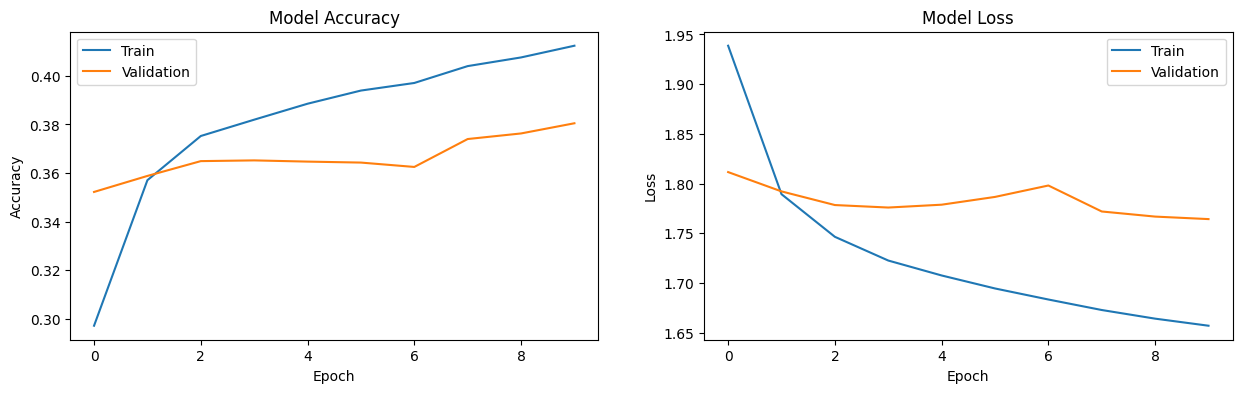

In [ ]:
# Plot training and validation accuracy scores against the number of epochs.
fig = plt.figure(figsize=(15,4))
fig.add_subplot(121)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(loc='upper left')
# Plot training and validation loss scores against the number of epochs.
fig.add_subplot(122)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc='upper right')

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.7497 - accuracy: 0.3803
Test loss: 1.7496668100357056
Test accuracy: 0.38029998540878296


313/313 [==============================] - 1s 2ms/step


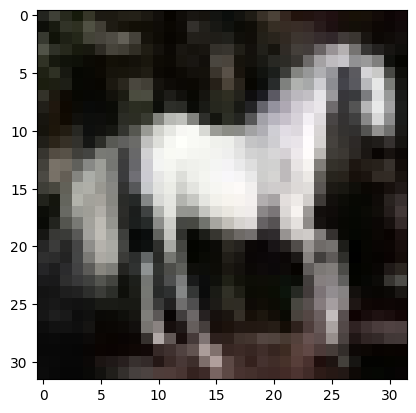

Predicted class: horse
Actual class: horse


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Make predictions
predictions = model.predict(x_test)

# Index of the image you want to test
testing = 13

# Display the image
plt.imshow(x_test[testing])
plt.show()

# Get the predicted class index
predicted_class_index = np.argmax(predictions[testing])

# Print the predicted class name
print("Predicted class:", class_names[predicted_class_index])

# Print the actual class name
print("Actual class:", class_names[np.argmax(y_test[testing])])
